<a href="https://colab.research.google.com/github/MagicMoleMM/ML/blob/main/TF_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
import tensorflow as tf
print(tf.__version__)

2.9.2


In [6]:
a = tf.Variable(10.)
b = tf.Variable(20.)

In [7]:
print(a*b)

tf.Tensor(200.0, shape=(), dtype=float32)


In [8]:
print(a+b)

tf.Tensor(30.0, shape=(), dtype=float32)


In [9]:
print(tf.exp(a))

tf.Tensor(22026.465, shape=(), dtype=float32)


In [11]:
model = tf.keras.Model()


In [50]:
from tensorflow.python.keras.layers import Dense, Input, Add
from tensorflow.python.keras import Model
import numpy as np


In [3]:
x = np.ones((4,3)) 
dense_layer = Dense(units=2, input_shape=(3,))
output = dense_layer(x)
print(f'Output: {output}')

Output: [[-0.80755866 -1.4823577 ]
 [-0.80755866 -1.4823577 ]
 [-0.80755866 -1.4823577 ]
 [-0.80755866 -1.4823577 ]]


In [4]:
w, b = dense_layer.get_weights()

print(f'Weights: {w}\nBias: {b}')

Weights: [[-0.63488305  0.33295906]
 [-0.8693028  -0.81114554]
 [ 0.69662726 -1.0041713 ]]
Bias: [0. 0.]


In [5]:
manual_output = np.matmul(x,w) + b
print(f'Manual output - {manual_output}')

Manual output - [[-0.8075586  -1.48235774]
 [-0.8075586  -1.48235774]
 [-0.8075586  -1.48235774]
 [-0.8075586  -1.48235774]]


### **Sequential Model**

In [10]:
model = tf.keras.Sequential()
model.add(Dense(10, input_shape=(10,), activation='relu'))
model.add(Dense(20, activation='relu', 
                bias_initializer=tf.keras.initializers.Constant(2.0)))
model.add(Dense(5,activation='softmax'))

In [11]:
sample_input = np.random.rand(2,10)
output = model(sample_input)
output

<tf.Tensor: shape=(2, 5), dtype=float32, numpy=
array([[1.0651056e-04, 3.4549952e-02, 7.5276124e-01, 9.4370003e-04,
        2.1163861e-01],
       [9.9897283e-05, 4.4089615e-02, 6.8350369e-01, 1.2898514e-03,
        2.7101696e-01]], dtype=float32)>

In [12]:
model.layers[1].get_weights()[1]

array([2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2.], dtype=float32)

In [13]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 module_wrapper_2 (ModuleWra  (2, 10)                  110       
 pper)                                                           
                                                                 
 module_wrapper_3 (ModuleWra  (2, 20)                  220       
 pper)                                                           
                                                                 
 module_wrapper_4 (ModuleWra  (2, 5)                   105       
 pper)                                                           
                                                                 
Total params: 435
Trainable params: 435
Non-trainable params: 0
_________________________________________________________________


In [14]:
model_no_input = tf.keras.Sequential()
model_no_input.add(Dense(10, activation='relu'))
model_no_input.add(Dense(20, activation='relu'))
model_no_input.add(Dense(5,activation='softmax'))

model_no_input.summary()

ValueError: ignored

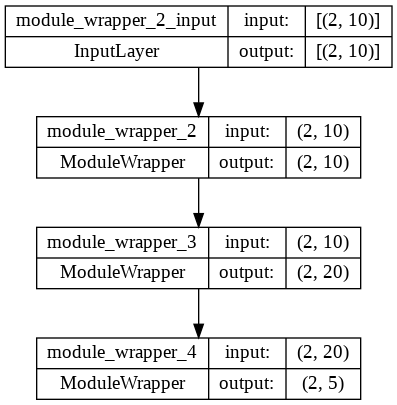

In [15]:
tf.keras.utils.plot_model(model, show_shapes=True)

## **Functional** **API**

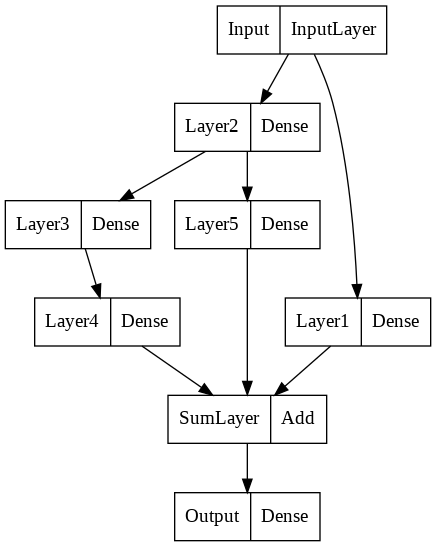

In [51]:
input_layer = Input(shape=(10, ), name='Input')

l1_output = Dense(10, name='Layer1')(input_layer)
l2_output = Dense(10, name='Layer2')(input_layer)
l3_output = Dense(10, name='Layer3')(l2_output)
l4_output = Dense(10, name='Layer4')(l3_output)
l5_output = Dense(10, name='Layer5')(l2_output)

sum_output = Add(name='SumLayer')([l1_output, l4_output, l5_output])
output = Dense(10, name='Output')(sum_output)

model = Model(inputs=input_layer, outputs=output)
tf.keras.utils.plot_model(model, show_shapes=False)